## Apartat C

In [17]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('Financial Distress.csv')
#dataset = dataset.drop(columns=['x80'])
dataset.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


**Company:** Identificador de quina empresa es la mostra.<br />
**Time:** Diferents períodes de temps als quals pertanyen les dades. La durada de les sèries temporals varia entre 1 i 14 per a cada empresa.<br />
**Financial Distress:** La variable objectiu es denota per "Financial Distress" si és superior a -0,50 l'empresa s'ha de considerar sana (0). En cas contrari, es consideraria amb dificultats financeres (1).<br />
**x1-x83:** Les característiques indicades per x1 a x83 són algunes de les característiques financeres i no financeres de les empreses mostrejades. Aquestes característiques pertanyen al període de temps anterior, que s'hauria d'utilitzar per predir si l'empresa patirà dificultats financeres o no (classificació). El creador del dataset no ens proporciona els noms reals ni el significat de aquestes variables, a excepció de la característica x80, que sabem que és una variable categòrica i que representa el tipus d'industra a la qual es dedica la empresa.

In [18]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [19]:
dataset.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


<IPython.core.display.Javascript object>


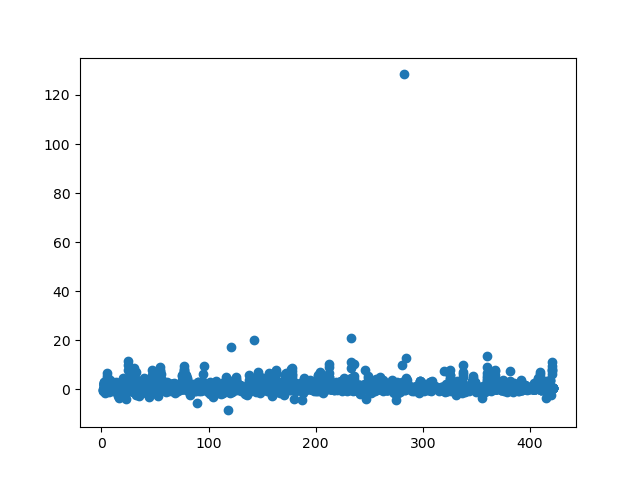

In [20]:
data = dataset.values
x = data[:, :]
x = np.delete(x, 2, 1)
y = data[:, 2]
plt.figure()
ax = plt.scatter(x[:,0], y)

(Hi ha un valor igual a 128 que es massa elevat i poc representatiu, molt probable que es tingui que treure)<br />
Eliminem la fila on es troba aquest valor, i tornem a visualitzar els punts de la mostra pel mateix atribut.

<IPython.core.display.Javascript object>


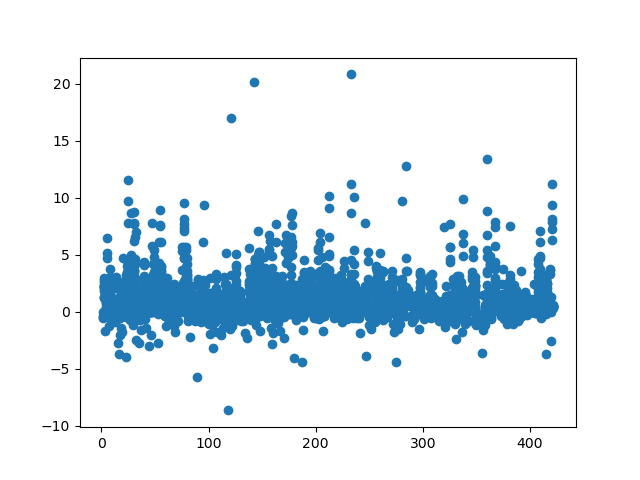

In [21]:
#print(y.max())
aux = np.where(y == y.max())[0]
y = np.delete(y, aux, 0)
x = np.delete(x, aux, 0)
plt.figure()
ax = plt.scatter(x[:,0], y)

#### Comprovem quins dels atributs tenen una distribució Gaussiana, per a la pregunta 2

##### Fent servir gràfiques:

<IPython.core.display.Javascript object>


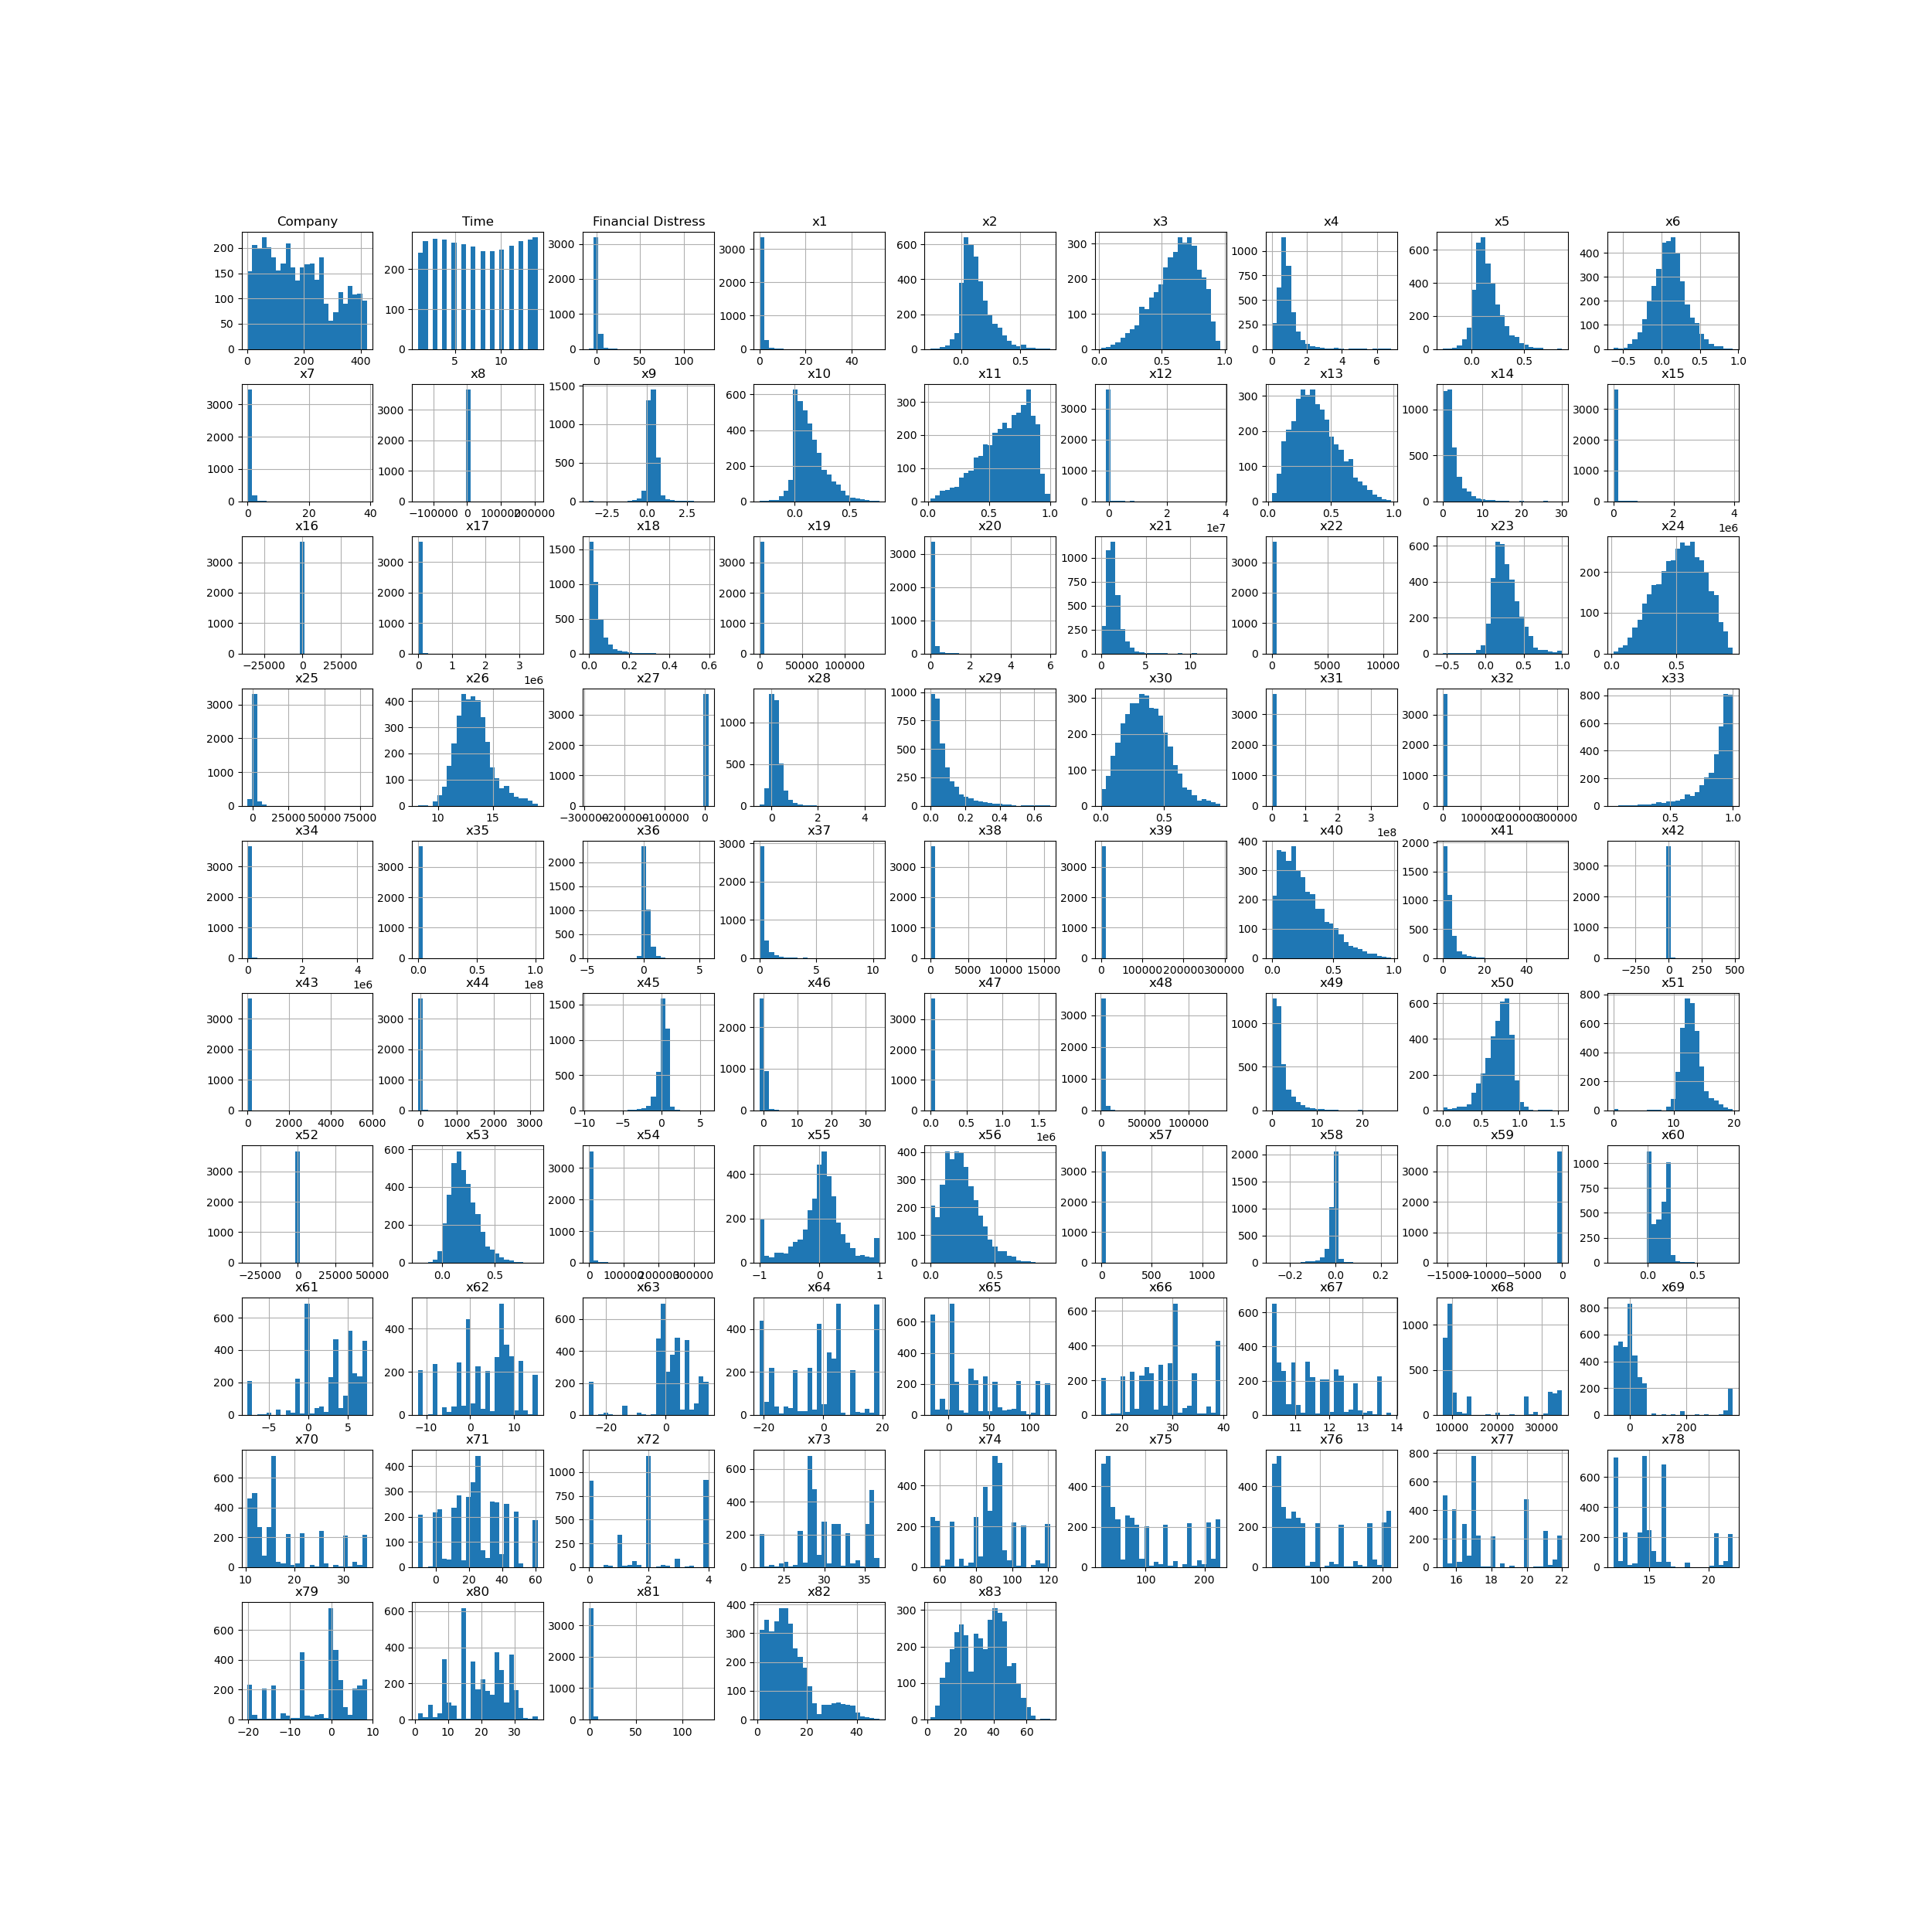

array([[<AxesSubplot:title={'center':'Company'}>,
        <AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Financial Distress'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:

In [22]:
dataset.hist(bins=25, figsize=(25, 25))

In [ ]:
plt.figure()
plt.title("Histograma de l'atribut Time")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,1], bins=14, range=[np.min(x[:,1]), np.max(x[:,1])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


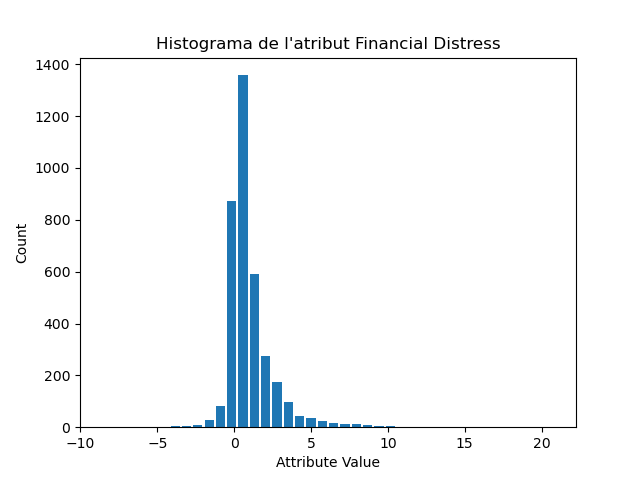

In [49]:
plt.figure()
plt.title("Histograma de l'atribut Financial Distress")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y, bins=40, range=[np.min(y), np.max(y)], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


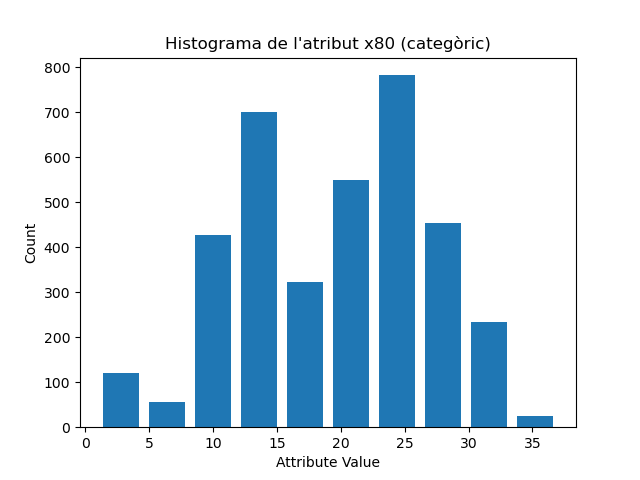

In [50]:
plt.figure()
plt.title("Histograma de l'atribut x80 (categòric)")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,81], bins=10, range=[np.min(x[:,81]), np.max(x[:,81])], histtype="bar", rwidth=0.8)

##### Fent servir test estadístic

<IPython.core.display.Javascript object>


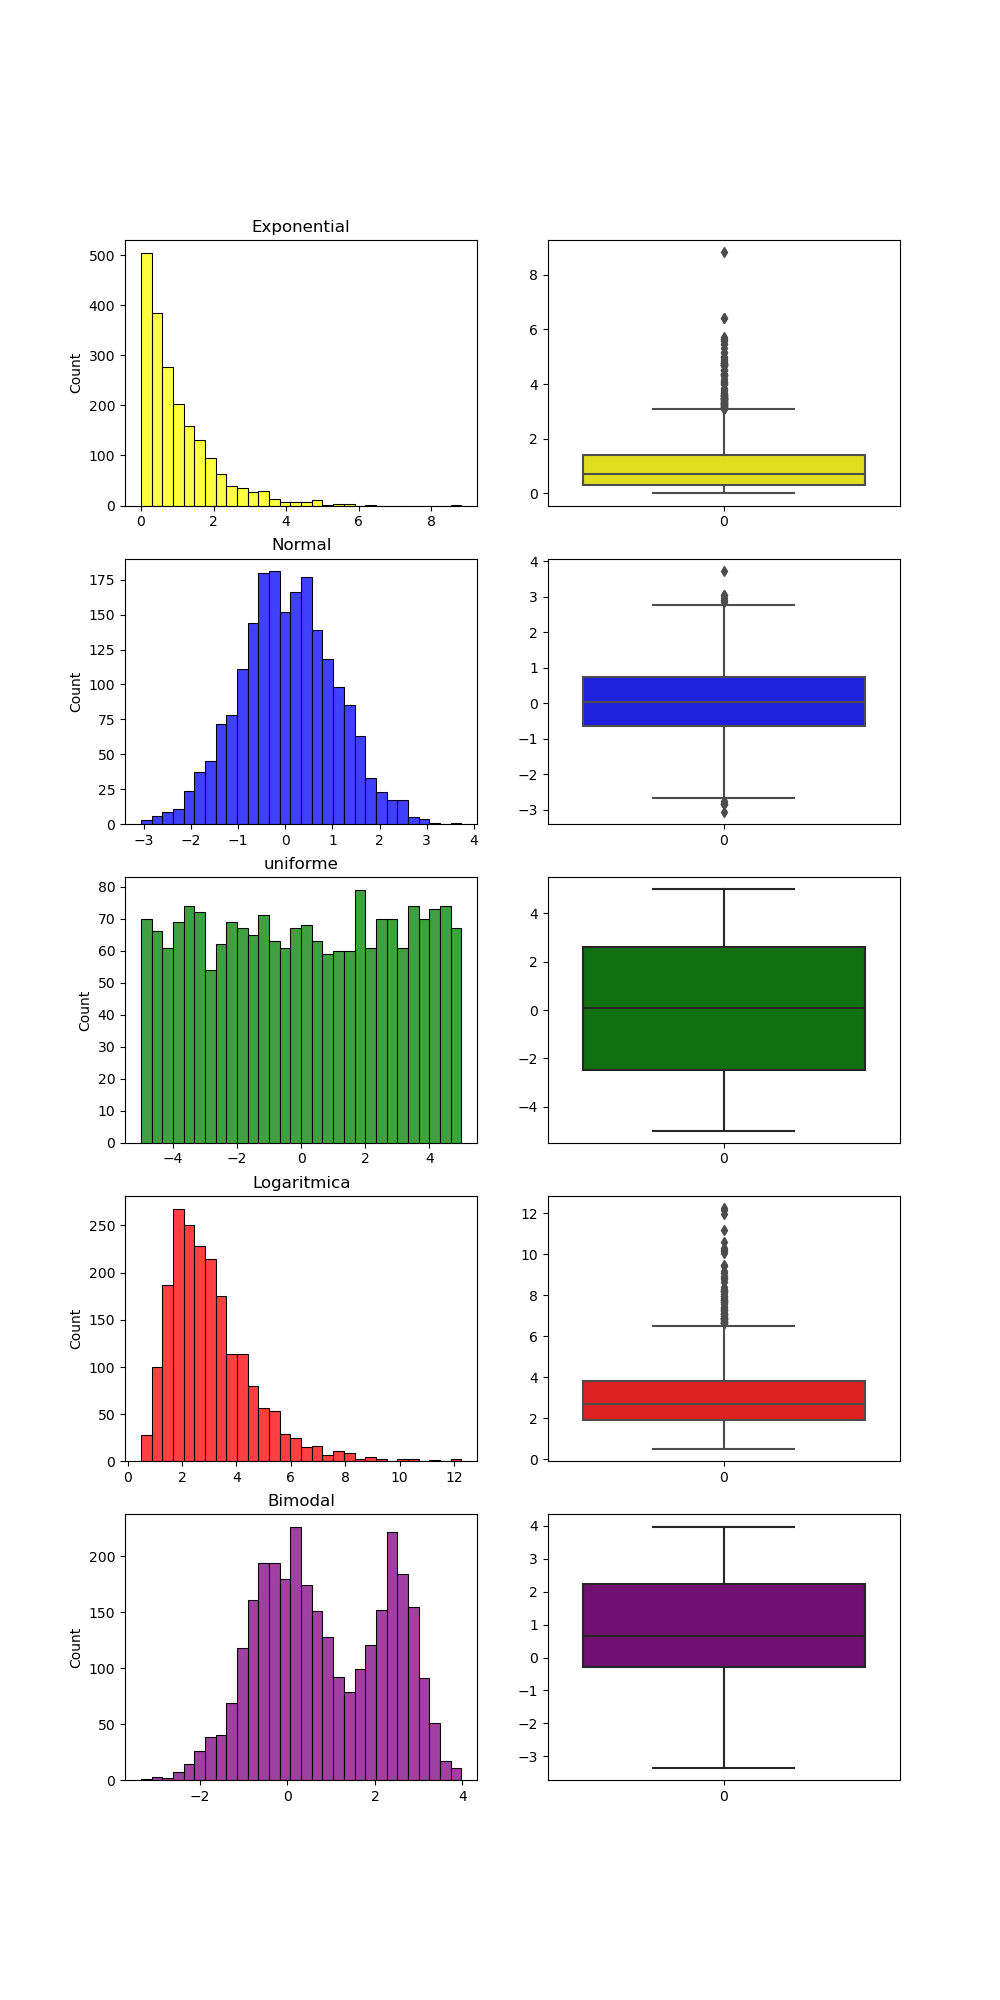

In [23]:
# 
samples = 2000

fig, axes = plt.subplots(5,2, figsize=(10, 20))
exp = np.random.exponential(1, samples)
norm = np.random.randn(samples,)
uni = np.random.uniform(-5, 5, samples)
logn = np.random.lognormal(1, .5, samples)
bim = np.concatenate([np.random.normal(0, 1, size=samples),np.random.normal(2.5, .5, size=samples // 2)])

sns.histplot(x=exp, color='yellow', ax=axes[0,0], bins=30)
sns.histplot(x=norm, color='blue', ax=axes[1, 0], bins=30)
sns.histplot(x=uni, color='green', ax=axes[2, 0], bins=30)
sns.histplot(x=logn, color='red', ax=axes[3, 0], bins=30)
sns.histplot(x=bim, color='purple', ax=axes[4, 0], bins=30)

sns.boxplot(data=exp, color='yellow', ax=axes[0,1])
sns.boxplot(data=norm, color='blue', ax=axes[1, 1])
sns.boxplot(data=uni, color='green', ax=axes[2, 1])
sns.boxplot(data=logn, color='red', ax=axes[3, 1])
sns.boxplot(data=bim, color='purple', ax=axes[4, 1])


axes[0,0].set_title('Exponential')
axes[1,0].set_title('Normal')
axes[2,0].set_title('uniforme')
axes[3,0].set_title('Logaritmica')
axes[4,0].set_title('Bimodal')

plt.show()

In [25]:
from scipy.stats import normaltest


for idx, dist in enumerate([norm, exp, uni, logn, bim]):

    stat, p = normaltest(dist)
    alpha = .05

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"The null hypothesis can be rejected")
    else:
        print(f"The null hypothesis cannot be rejected (comes from a normal dist)")


The null hypothesis cannot be rejected (comes from a normal dist)
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected


Els atributs de Company, Time y x80 els eliminem

In [52]:
dataset.drop(columns=['Company','Time','x80'])
data = dataset.values
x = data[:, :]
x = np.delete(x, 2, 1)
y = data[:, 2]
plt.figure()
ax = plt.scatter(x[:,0], y)

KeyError: "['Company', 'Time', 'x80'] not found in axis"

<IPython.core.display.Javascript object>


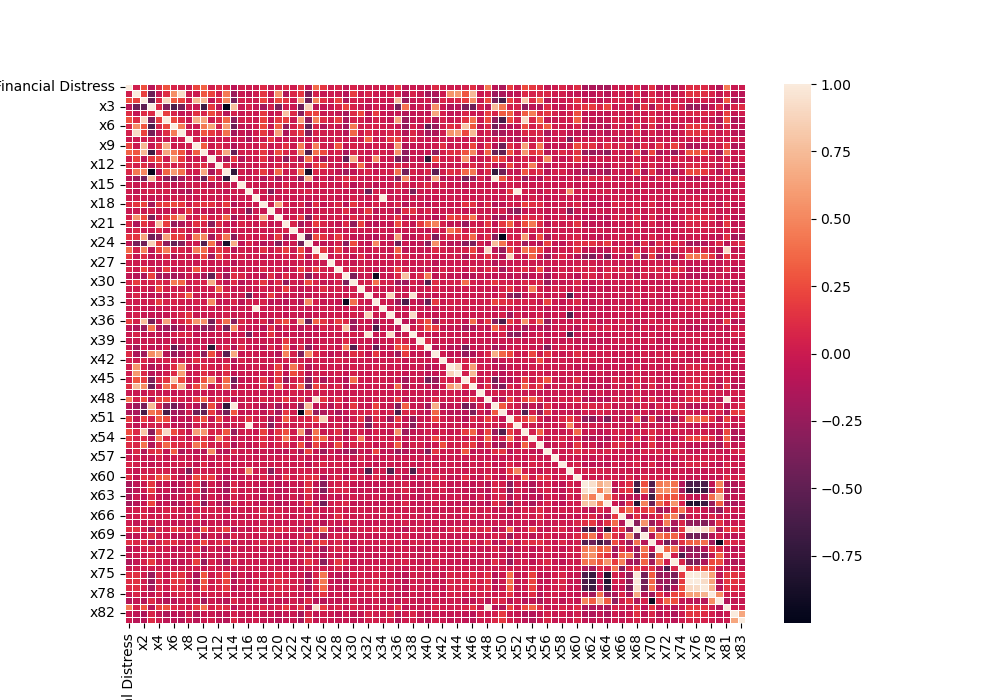

In [65]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.rcParams['figure.figsize'] = [10, 7]  # Ajustar les dimensions de la vista

plt.figure()

ax = sns.heatmap(correlacio, annot=False, linewidths=.5)

In [ ]:
# Mirem la relació entre atributs utilitzant la funció pairplot
sns.pairplot(dataset[:10])

Apliquem PCA als atributs x1-x83. Abans estandaritzem els valors (mitjana = 0, desviació estàndard = 1).<br />
Com a resultat inserim els nous atributs en substitució als originals (el valor n_components pot variar en funció de la qualitat final del model).

In [53]:
from sklearn.decomposition import PCA

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

components = 2

aux_x = x[:,2:]
#aux_x = np.delete(aux_x, 79, 1)
aux_x = standarize(aux_x)
pca = PCA(n_components=components)
aux_pca = pca.fit_transform(aux_x)
x = np.concatenate((x[:,0:2], aux_pca), axis=1)
print(x)

[[ 0.010636    1.281      -5.78370661  0.33138914]
 [-0.45597     1.27       -4.26878558 -1.24883684]
 [-0.32539     1.0529     -6.0719048  -4.38142845]
 ...
 [ 0.50077     1.7099      7.4376836   0.17917971]
 [ 0.61103     1.559       5.58446351 -0.03590192]
 [ 0.51865     1.6148      6.05448109 -0.89349366]]


In [54]:
x_labels = ['Company', 'Time']
for i in range(2, x.shape[1]):
    x_labels.append('x' + str(i-1))
x_labels.append('Financial Distress')
#print(x[:,:2])
#print(y[np.newaxis].T)
new_dataset = pd.DataFrame(np.append(x, y[np.newaxis].T, axis=1), columns = x_labels)
new_dataset

,Company,Time,x1,x2,Financial Distress
0,0.010636,1.2810,-5.783707,0.331389,0.022934
1,-0.455970,1.2700,-4.268786,-1.248837,0.006454
2,-0.325390,1.0529,-6.071905,-4.381428,-0.059379
3,-0.566570,1.1131,-4.474114,-1.383174,-0.015229
4,1.357300,1.0623,-4.164276,2.516459,0.107020
...,...,...,...,...,...
3667,0.438020,2.2605,5.793445,2.737381,0.202890
3668,0.482410,1.9615,8.505501,-0.244966,0.216440
3669,0.500770,1.7099,7.437684,0.179180,0.207970
3670,0.611030,1.5590,5.584464,-0.035902,0.185450


<IPython.core.display.Javascript object>


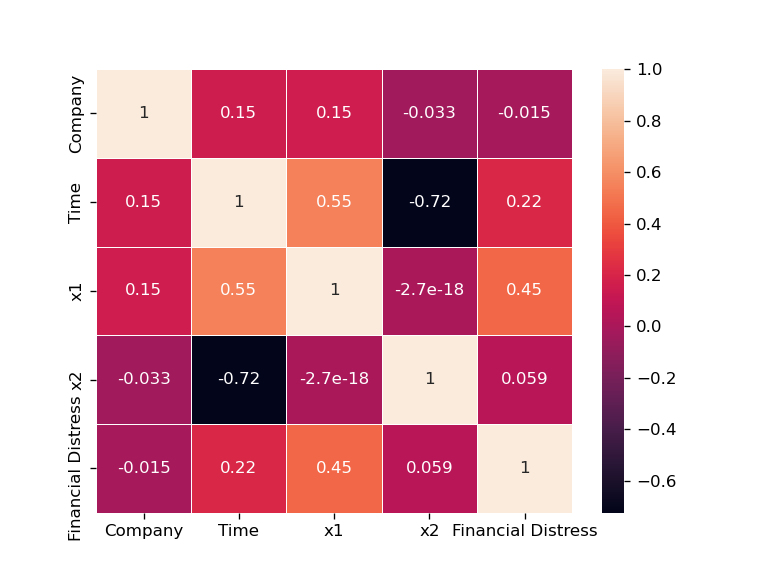

In [33]:
import seaborn as sns

correlacio = new_dataset.corr()
plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


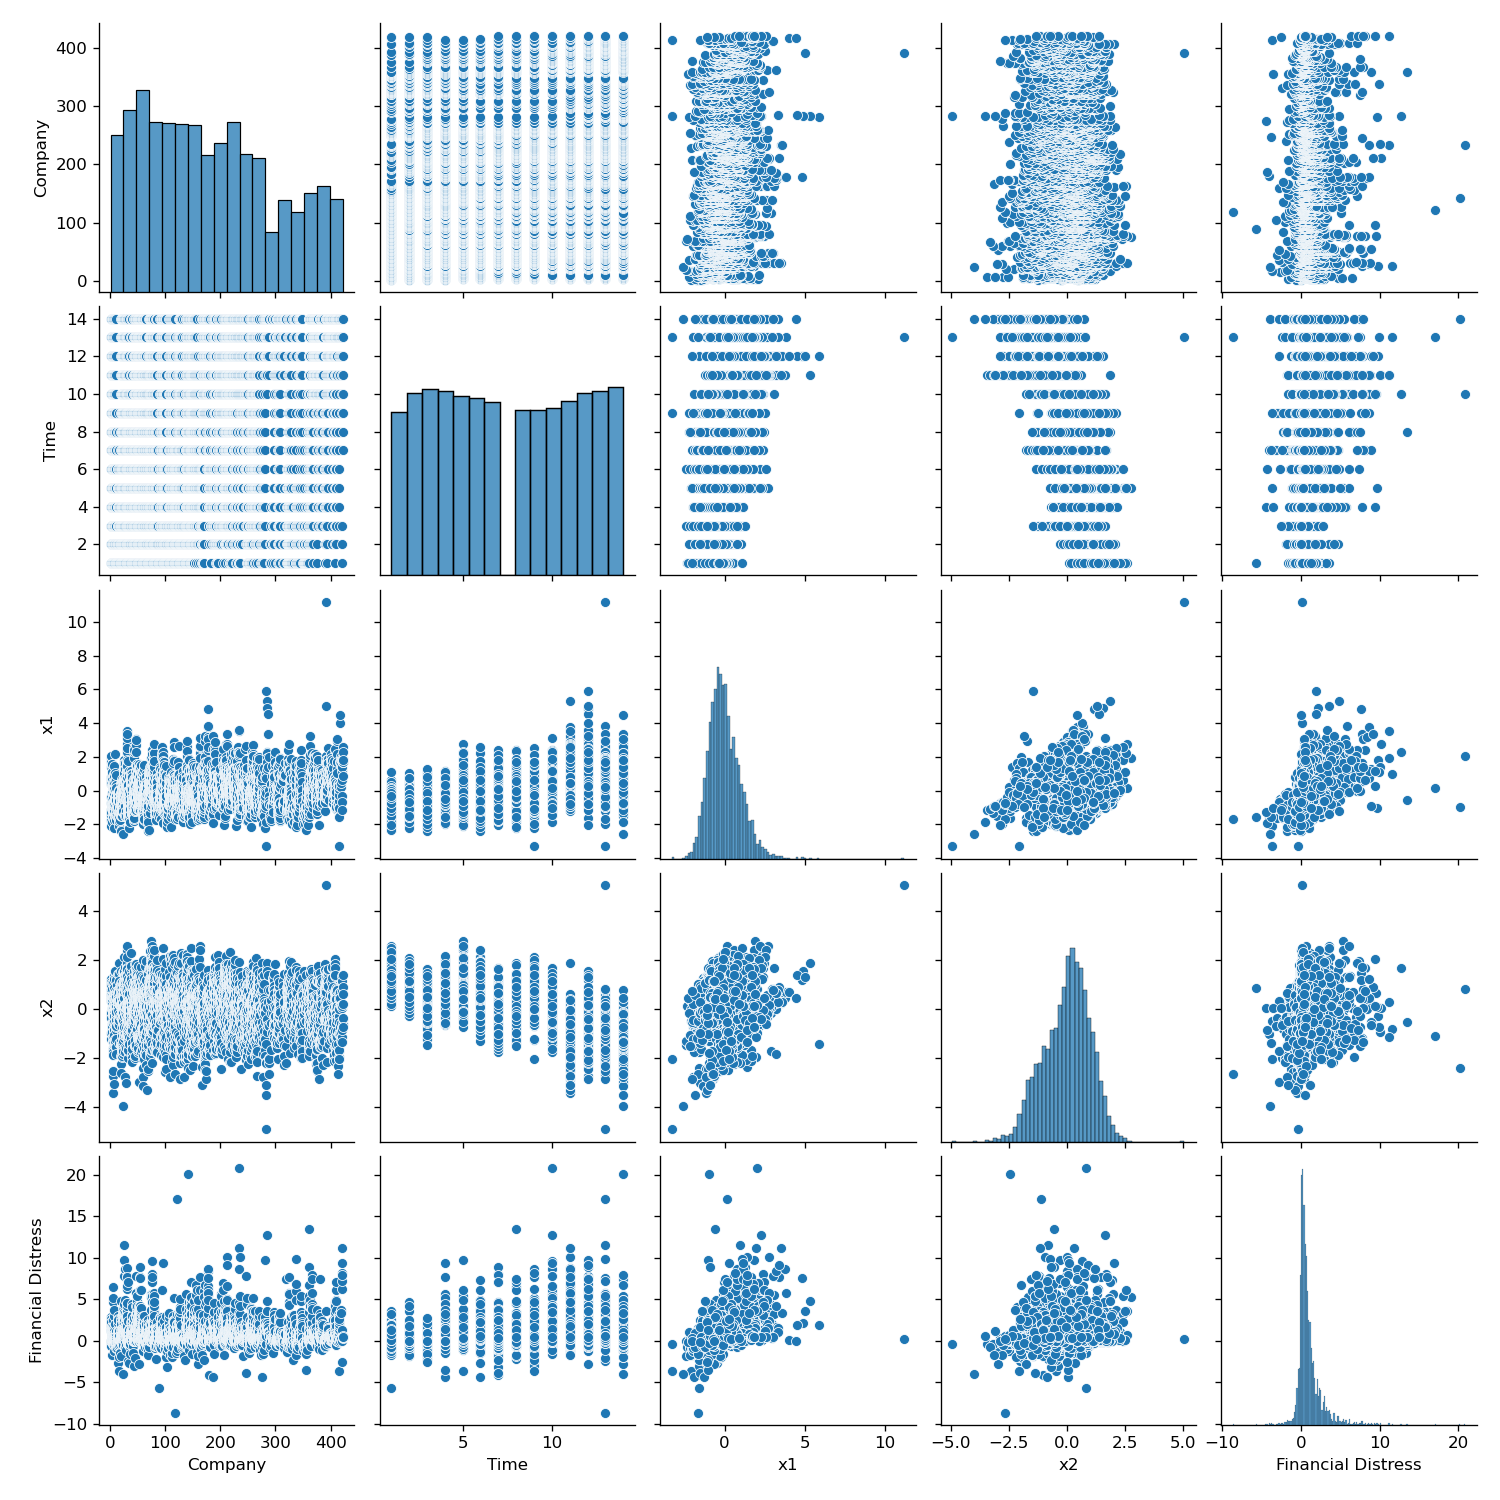

In [34]:
relacio = sns.pairplot(new_dataset)

**1. Quin és el tipus de cada atribut?**<br />
En total hi han 86 atributs diferents, dels quals 5 son int64 (Company, Time, x80, x82, x83). La resta són float64.<br />
**2. Quins atributs tenen una distribució Gaussiana?**<br />
L'atribut Financial Distress.<br />
**3. Quin és l'atribut objectiu? Per què?**<br />
(TBD)<br />

## Apartat B

(Provar regressor lineal per atributs diferents)

<IPython.core.display.Javascript object>


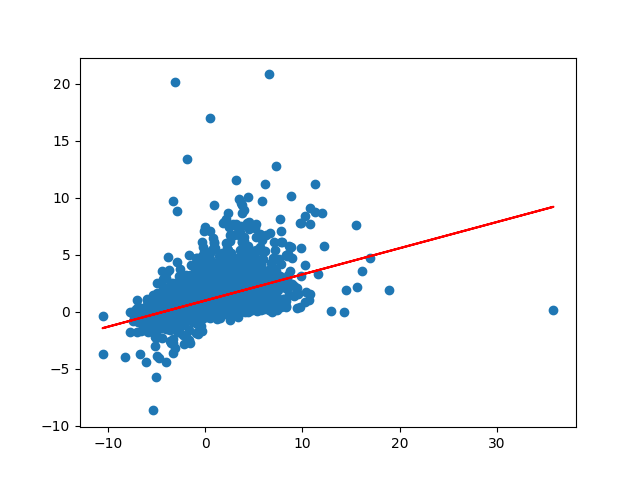

Mean squeared error:  2.0757826922091693
R2 score:  0.20606600584838342
[[  1.           1.          -5.62144455   1.28223496]
 [  1.           2.          -4.43955942  -0.64838524]
 [  1.           3.          -6.65492492  -3.37558161]
 ...
 [422.          12.           7.30394433  -1.07767634]
 [422.          13.           5.45641007  -1.04277919]
 [422.          14.           5.7782078   -1.97584383]]


In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regression(x, y):
    regr = LinearRegression()
    regr.fit(x, y)
    return regr

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

n_attribute = 2

attribute = new_dataset.values[:,n_attribute].reshape(new_dataset.values.shape[0], 1)
y = new_dataset.values[:,-1].reshape(new_dataset.values.shape[0], 1)
regr = regression(attribute, y) 
predicted = regr.predict(attribute)

plt.figure()
ax = plt.scatter(new_dataset.values[:,n_attribute], y)
plt.plot(attribute[:,0], predicted, 'r')

MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)
print(new_dataset.values[:,:-1])

In [179]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

#print(x[:,2:], y)
x_train, y_train, x_val, y_val = split_data(x[:,2:], y)
mses, r2s = [], []

for i in range(x_train.shape[1]):
    x_t = x_train[:,i]
    x_v = x_val[:,i]
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v))
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut x%d: %f" %(i+1, error))
    print("R2 score en atribut x%d: %f" %(i+1, r2))

Error en atribut x1: 2.340327
R2 score en atribut x1: 0.191384
Error en atribut x2: 2.909248
R2 score en atribut x2: -0.005186


**1. Quin són els atributs més importants per fer una bona predicció?**<br />
L'atribut x1.<br />
**2. Amb quin atribut s'assoleix un MSE menor?**<br />
L'atribut x1.<br />
**3. Quina correlació hi ha entre els atributs de la vostra base de dades?**<br />
(TBD)<br />
**4. Com influeix la normalització en la regressió?**<br />
(TBD)<br />
**5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?**<br />
(TBD)<br />
**6. Si s'aplica un PCA, a quants components es redueix l'espai? Per què?**<br />
(TBD)<br />